<font color = green >

## Home Task: Implement K-means algorithm

</font>


<font color = green >

###  Data 

</font>



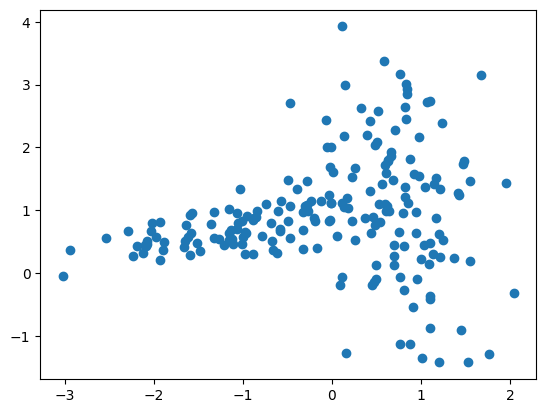

In [153]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from sklearn.datasets import make_classification
Xc_2,_= make_classification(n_samples=200,
                                    n_features=2,
                                    n_informative=2,
                                    n_redundant=0,
                                    random_state=0,
                                    n_clusters_per_class=1,
                                    class_sep = 0.8)
plt.figure()
plt.scatter  (Xc_2[:,0], Xc_2[:,1])

<font color = green >

###  Steps of implementatiion

</font>

1) Initialize $K$ centroids 

2) Assign every point to closest centroid 

3) Compute new centroids as means of samples assigned to corresponding centroid

4) Implement cost $J = \frac{1}{m}\underset{i}{\sum}(d^{(i)})^{2}$ where $d^{(i)}$ is distance from sample $x^{(i)}$ to assigned centroid $c^{(i)}$

5) Iterate setps 2,3 till cost is stabile 

6) Select the best clustering (with the least cost) from 100 results computed with random centroid  initializations 

7) Visualize results (clusters, centroids) for $K=4$

Note: 
* You may  need develop couple of additional/intermediate functions
* You may track cost changes to make sure the algorithm is working properly 

In [174]:
import numpy as np

class K_means_algorithm:
    def __init__(self, points, k):
        self.points = points
        self.k=k
        self.centroids = []
        self.closed_centroids = []
        self.J_hist = []
    
    def init_centroids(self, seed=2024, k=None):
        np.random.seed(seed)
        self.centroids=self.points [np.random.choice(len(self.points), self.k)]
        return self.centroids
    
    def compute_distances(self, n1=None, n2=None): 
        if n1 is None and n2 is None:
            return np.array([np.apply_along_axis(np.linalg.norm, 1, self.points - c) for c in self.centroids])
        elif n1 is not None and n2 is not None:
            return np.array([np.apply_along_axis(np.linalg.norm, 1, n1 - c) for c in n2])
        else:
            return None


    def compute_closest_centroids(self):       
        all_distances = self.compute_distances()
        self.closest_centroids = np.apply_along_axis(np.argmin,0,all_distances)
        return self.closest_centroids
    
    def compute_means(self):
        new_centroids= []
        for i in range (len(self.centroids)):
            if i not in self.closest_centroids:
                new_centroids.append(self.centroids[i])
            else: 
                new_centroid= np.mean(self.points[np.where(self.closest_centroids==i)], axis = 0)
                new_centroids.append(new_centroid)
        return new_centroids
    
    def new_centroids(self):
        new_centroids= []
        for i in range (len(self.centroids)):
            if i not in self.closest_centroids:
                new_centroids.append(self.centroids[i])
            else: 
                new_centroid= np.mean(self.points[np.where(self.closest_centroids==i)], axis = 0)
                new_centroids.append(new_centroid)
        self.centroids=new_centroids
        return self.centroids

    def J(self):
        all_dist = [] 
        for c_index in set(self.closest_centroids):
            assigned_samples = self.points[np.where(self.closest_centroids==c_index)]
            all_dist_centroid = self.compute_distances(assigned_samples, [self.centroids[c_index]])
            all_dist.append(np.sum(all_dist_centroid))
        m = len(self.closest_centroids)
        return 1/m* np.sum(all_dist)
    
    def fit(self, points_=None, k_=None):
        if points_ is not None and k_ is not None:
            self.points = points_
            self.k=k_
            self.init_centroids()
            self.compute_closest_centroids()
            return self.J()
        else:
            self.init_centroids()
            self.compute_closest_centroids()
            return self.J()
    
    def run_kmeans(self,iterations=100):
        self.J_hist.append(self.J())
        print('START iteration, cost= {}'.format(self.J()))
        for i in range(iterations):
            self.compute_closest_centroids()
            self.new_centroids()
            if self.J_hist[-1] == self.J():
                print('{} iteration, cost= {} BREAKED!'.format(i, self.J()))
                break
            #colors=['red', 'green', 'blue', 'orange']
            #self.draw_graph(colors, self.centroids, self.closest_centroids)
            print('{} iteration, cost= {}'.format(i, self.J()))
            self.J_hist.append(self.J())

    def draw_cost(self):
        if self.J_hist:
            plt.figure ()
            plt.plot(self.J_hist)
            plt.xlabel('Iterations')
            plt.ylabel('Cost function J')

    def draw_graph(self, colors, centroids_=None, closest_centroids_=None):
        if centroids_ and closest_centroids_ is not None:
            plt.figure()
            plt.scatter(self.points[:, 0], self.points[:, 1], c=[colors[i] for i in closest_centroids_])
            for i, c in enumerate(centroids_):
                plt.scatter(c[0], c[1], marker='x', color='black', s=140)
        else:
            self.compute_closest_centroids()
            plt.figure()
            plt.scatter(self.points[:, 0], self.points[:, 1], c=[colors[i] for i in self.closest_centroids])
            for i, c in enumerate(self.centroids):
                plt.scatter(c[0], c[1], marker='x', color='black', s=140)

START iteration, cost= 0.8937368789854319
0 iteration, cost= 0.7791155996564587
1 iteration, cost= 0.6755137661569758
2 iteration, cost= 0.6524459896074509
3 iteration, cost= 0.6444683994456979
4 iteration, cost= 0.6364968468182621
5 iteration, cost= 0.6318324853022618
6 iteration, cost= 0.6297144487572417
7 iteration, cost= 0.6287685034839183
8 iteration, cost= 0.6268656444247792
9 iteration, cost= 0.6213276249748135
10 iteration, cost= 0.6149035568304515
11 iteration, cost= 0.6116269868183322
12 iteration, cost= 0.6098562042098453
13 iteration, cost= 0.6075427533550225
14 iteration, cost= 0.6057091240772724
15 iteration, cost= 0.605865047249208
16 iteration, cost= 0.605865047249208 BREAKED!


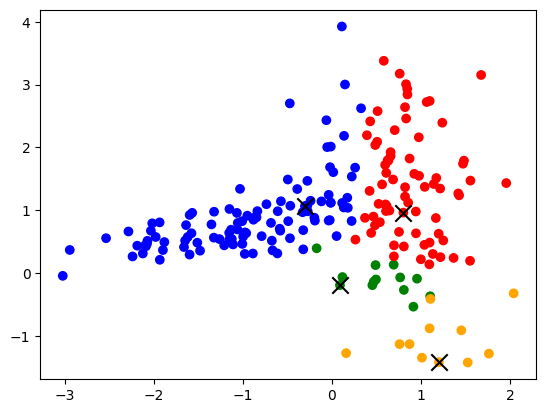

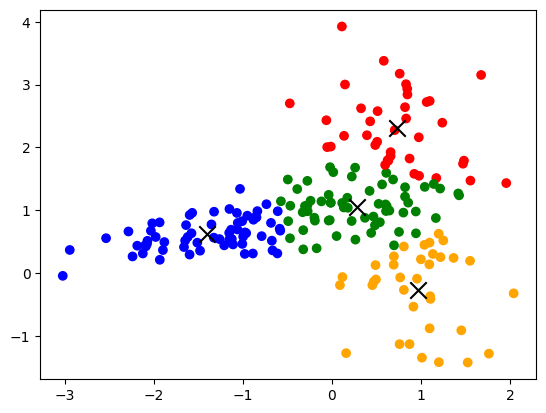

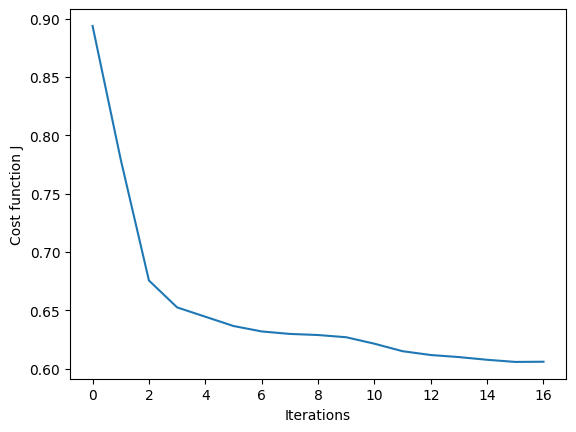

In [175]:
k_means = K_means_algorithm(Xc_2, 4)
k_means.fit()
colors=['red', 'green', 'blue', 'orange']
k_means.draw_graph(colors)
k_means.run_kmeans()
k_means.draw_graph(colors)
k_means.draw_cost()

c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


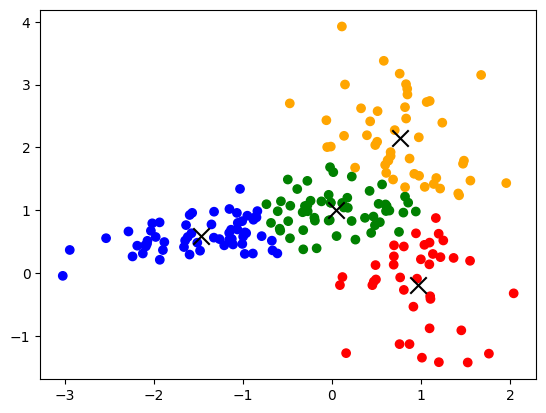

In [200]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4)
kmeans.fit(Xc_2)
colors=['red', 'green', 'blue', 'orange']
plt.scatter(Xc_2[:,0], Xc_2[:,1],  c=[colors[i] for i in kmeans.labels_])
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c='black', marker='x', s=140)